In [ ]:
 # Подгрузим пакеты 
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt  
import seaborn as sns
from scipy.stats import mannwhitneyu

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

**1. Загрузите файл HR.csv в pandas dataframe**

In [ ]:
df_hr_main = pd.read_csv('HR.csv') 
df_hr_main 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


**2. Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).**

In [ ]:
df_hr_main.groupby('department').mean().sort_values(by='satisfaction_level')[['satisfaction_level','left']]
# по таблице можно увидеть наличие обратной связи степени удовлетворенности и увольнением сотрудников (чем больше удовлетворен отдел тем меньше в нем увольняются сотрудники)

,satisfaction_level,left
department,,
accounting,0.582151,0.265971
hr,0.598809,0.290934
technical,0.607897,0.256250
sales,0.614447,0.244928
IT,0.618142,0.222494
support,0.618300,0.248991
marketing,0.618601,0.236597
product_mng,0.619634,0.219512
RandD,0.619822,0.153748


In [ ]:
df_hr_main.groupby('department').median().sort_values(by='satisfaction_level')[['satisfaction_level','left']]

,satisfaction_level,left
department,,
accounting,0.610,0
hr,0.610,0
marketing,0.640,0
product_mng,0.640,0
sales,0.640,0
technical,0.640,0
RandD,0.650,0
support,0.650,0
management,0.655,0


In [ ]:
print('Чаще всего сотрудники не увольняются. mode(left) =',df_hr_main['left'].mode()[0])

Чаще всего сотрудники не увольняются. mode(left) = 0


In [ ]:
# Хоть отдел accounting меньше всех доволен работой, но всё равно чаще сотрудники не увольняются из данного отдела
df_hr_main.loc[df_hr_main['department'] == 'accounting' ]['left'].mode()[0]

0

In [ ]:
print('Минимальный Уровень удовлетворенности работой:', df_hr_main['satisfaction_level'].min())
print('Максимальный Уровень удовлетворенности работой:', df_hr_main['satisfaction_level'].max())
print('СКО Уровень удовлетворенности работой =', df_hr_main['satisfaction_level'].std())
print('Дисперсия Уровень удовлетворенности работой =', df_hr_main['satisfaction_level'].var())
print('Квантиль', df_hr_main['satisfaction_level'].quantile())
print('Первый и третий квартили:\n', df_hr_main['satisfaction_level'].quantile([0.25, 0.75]))

q1 = df_hr_main['satisfaction_level'].quantile(0.25)
q3 = df_hr_main['satisfaction_level'].quantile(0.75)
iqr = q3 - q1
print('Межквартильный размах:', iqr)

Минимальный Уровень удовлетворенности работой: 0.09
Максимальный Уровень удовлетворенности работой: 1.0
СКО Уровень удовлетворенности работой = 0.2486306510611418
Дисперсия Уровень удовлетворенности работой = 0.061817200647087255
Квантиль 0.64
Первый и третий квартили:
 0.25    0.44
0.75    0.82
Name: satisfaction_level, dtype: float64
Межквартильный размах: 0.37999999999999995


In [ ]:
df_hr_main.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


**3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.Определите две самые скоррелированные и две наименеескоррелированные переменные.**

In [ ]:
salary_dictionary = {'low' : 1, 'medium' : 2, 'high' : 3}
df_hr_main['salary_int'] = df_hr_main['salary'].map(salary_dictionary)

In [ ]:
df_hr_numerical_metrics = df_hr_main[['satisfaction_level', 'number_project', 'average_montly_hours', 'time_spend_company', 'promotion_last_5years', 'salary_int', 'left' ]].copy()
df_hr_numerical_metrics.corr()

,satisfaction_level,number_project,average_montly_hours,time_spend_company,promotion_last_5years,salary_int,left
satisfaction_level,1.000000,-0.142970,-0.020048,-0.100866,0.025605,0.050022,-0.388375
number_project,-0.142970,1.000000,0.417211,0.196786,-0.006064,-0.001803,0.023787
average_montly_hours,-0.020048,0.417211,1.000000,0.127755,-0.003544,-0.002242,0.071287
time_spend_company,-0.100866,0.196786,0.127755,1.000000,0.067433,0.048715,0.144822
promotion_last_5years,0.025605,-0.006064,-0.003544,0.067433,1.000000,0.098119,-0.061788
salary_int,0.050022,-0.001803,-0.002242,0.048715,0.098119,1.000000,-0.157898
left,-0.388375,0.023787,0.071287,0.144822,-0.061788,-0.157898,1.000000


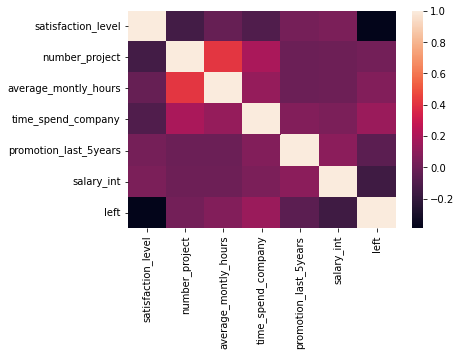

In [ ]:
sns.heatmap(df_hr_numerical_metrics.corr())

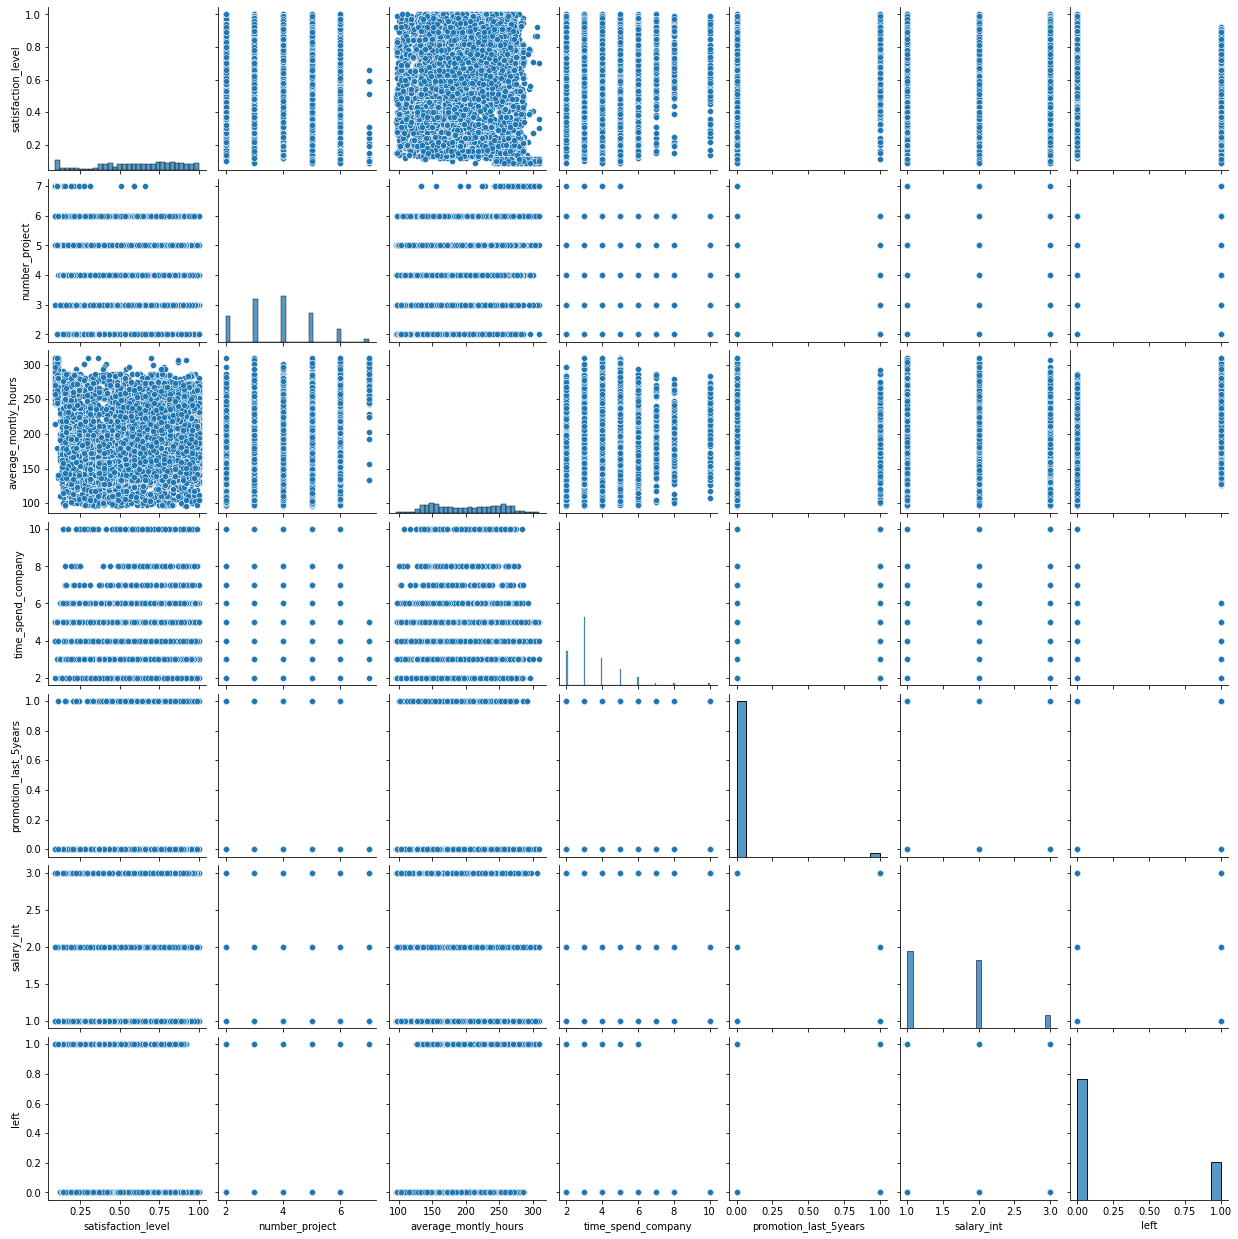

In [ ]:
sns.pairplot(df_hr_numerical_metrics)

In [ ]:
print('Судя по матрице корреляции...')
print('Две самые скоррелированные переменные: number_project и average_montly_hours. Среднее количество часов на рабочем месте в месяц зависит от количества проектов')
print('Две наименеескоррелированные переменные: number_project и salary_int. Уровень заработной платы не зависит от количества проектов')

Судя по матрице корреляции...
Две самые скоррелированные переменные: number_project и average_montly_hours. Среднее количество часов на рабочем месте в месяц зависит от количества проектов
Две наименеескоррелированные переменные: number_project и salary_int. Уровень заработной платы не зависит от количества проектов


In [ ]:
df_hr_numerical_metrics[['number_project', 'average_montly_hours']].corr(method='spearman')

,number_project,average_montly_hours
number_project,1.000000,0.397855
average_montly_hours,0.397855,1.000000


In [ ]:
df_hr_numerical_metrics[['number_project', 'salary_int']].corr(method='spearman')

,number_project,salary_int
number_project,1.000000,0.004453
salary_int,0.004453,1.000000


**4. Рассчитайте сколько сотрудников работает в каждом департаменте.**

In [ ]:
df_hr_main.groupby('department').count().sort_values(by='satisfaction_level', ascending=False)[['satisfaction_level']]

,satisfaction_level
department,
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739


**5. Показать распределение сотрудников по зарплатам.**

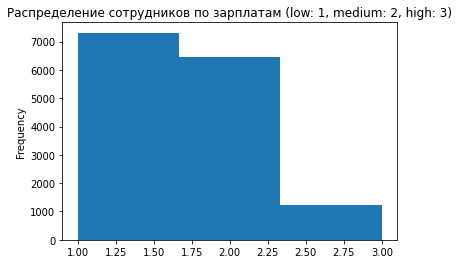

In [ ]:
df_hr_main['salary_int'].plot(kind='hist', 
                   title='Распределение сотрудников по зарплатам (low: 1, medium: 2, high: 3)', bins=3)

**6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности**

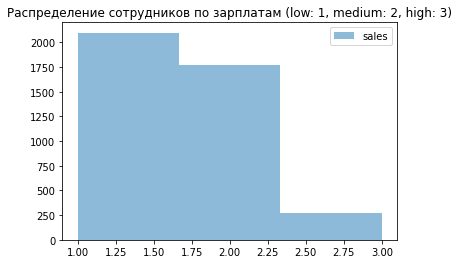

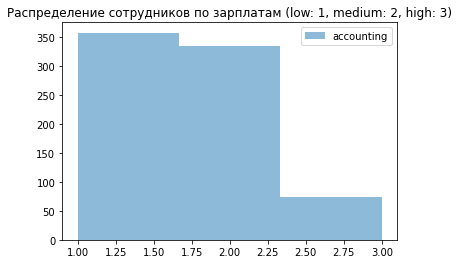

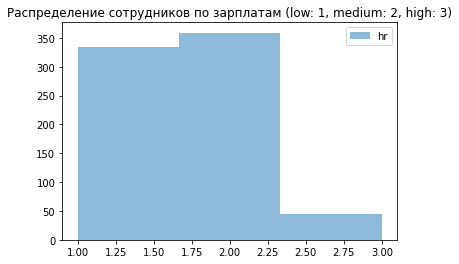

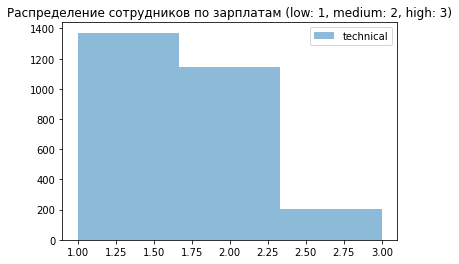

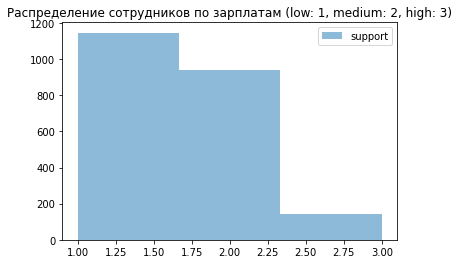

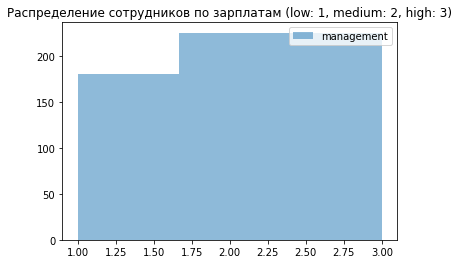

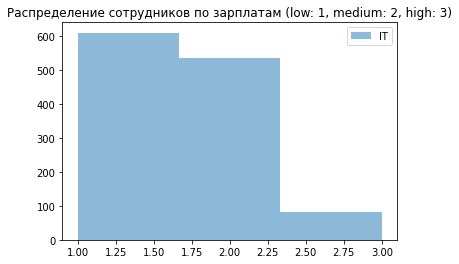

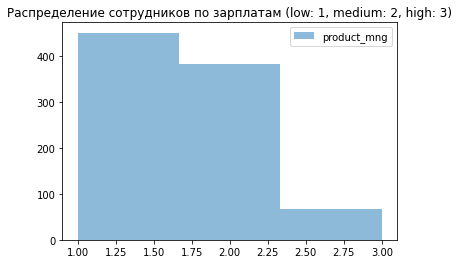

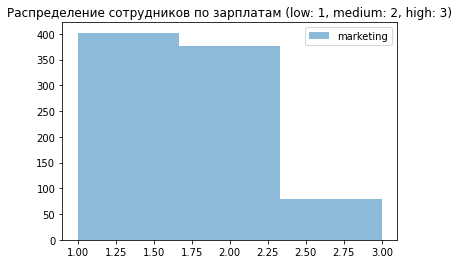

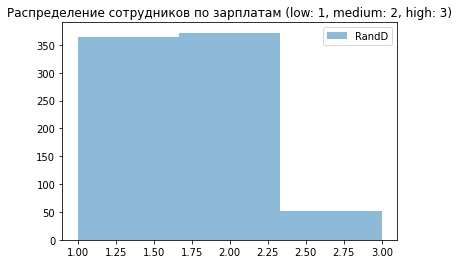

In [ ]:
list_departments = list(df_hr_main['department'].unique())
for i in range(len(list_departments)):
  plt.hist(df_hr_main.loc[df_hr_main['department'] == list_departments[i]]['salary_int'], bins = 3 , alpha = 0.5, label=list_departments[i])
  plt.legend(loc='upper right')
  plt.title('Распределение сотрудников по зарплатам (low: 1, medium: 2, high: 3)')
  plt.show()

**7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом**

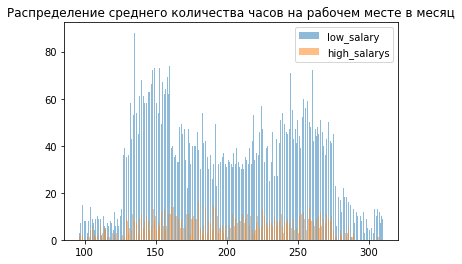

In [ ]:
df_low_salary = df_hr_main.loc[df_hr_main['salary_int'] == 1]['average_montly_hours']
df_high_salary = df_hr_main.loc[df_hr_main['salary_int'] == 3]['average_montly_hours']

plt.hist(df_low_salary, bins = 333 , alpha = 0.5, label='low_salary')
plt.hist(df_high_salary, bins = 333 , alpha = 0.5, label='high_salarys')
plt.legend(loc='upper right')
plt.title('Распределение среднего количества часов на рабочем месте в месяц')
plt.show()

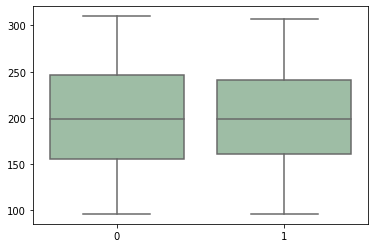

In [ ]:
ax = sns.boxplot( data = [df_low_salary,df_high_salary], color='#99c2a2')
plt.show()

In [ ]:
# Визуально различий нет. 
# Проверим гипотезу с помощью T-теста Студента
tvalue, pvalue = stats.ttest_ind(df_low_salary, df_high_salary)  
print('T-теста Студента. pvalue =', pvalue) 

alpha = 0.05
if pvalue > alpha:
    print('Рабочее время для сотрудников с высоким и низким окладом не резаличимо (не отвергаем H0)')
else:
    print('Разное рабочее время для сотрудников с высоким и низким окладом (отвергаем H0)')

# Проверим гипотезу с помощью U-теста Манна-Уитни
stat, p = mannwhitneyu(df_low_salary, df_high_salary) # U-тест Манна-Уитни
print('\nU-тест Манна-Уитни. pvalue =', p)


# Интерпретируем
alpha = 0.05   # Уровень значимости
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

T-теста Студента. pvalue = 0.4661023478267259
Рабочее время для сотрудников с высоким и низким окладом не резаличимо (не отвергаем H0)

U-тест Манна-Уитни. pvalue = 0.4120665360429347
Одинаковые распределения (не отвергаем H0)


**8. Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):**

- Доля сотрудников с повышением за последние 5 лет

- Средняя степень удовлетворенности

- Среднее количество проектов

In [ ]:
df_retire_employee = df_hr_main.loc[df_hr_main['left'] == 1]
df_no_retire_employee = df_hr_main.loc[df_hr_main['left'] != 1]

# Доля сотрудников с повышением за последние 5 лет
print('Доля сотрудников с повышением за последние 5 лет среди уволенных сотрудников -',round(100*df_retire_employee.loc[df_retire_employee['promotion_last_5years'] == 1].count()[0]/df_retire_employee.count()[0], 2), '%')
print('Доля сотрудников с повышением за последние 5 лет среди НЕ уволенных сотрудников -',round(100*df_no_retire_employee.loc[df_no_retire_employee['promotion_last_5years'] == 1].count()[0]/df_no_retire_employee.count()[0], 2), '%')
print()

# Средняя степень удовлетворенности
print('Средняя степень удовлетворенности среди уволенных сотрудников -',df_retire_employee['satisfaction_level'].median())
print('Средняя степень удовлетворенности среди НЕ уволенных сотрудников -',df_no_retire_employee['satisfaction_level'].median())
print()

# Среднее количество проектов
print('Среднее количество проектов среди уволенных сотрудников -',df_retire_employee['number_project'].mean())
print('Среднее количество проектов среди НЕ уволенных сотрудников -',df_no_retire_employee['number_project'].mean())


Доля сотрудников с повышением за последние 5 лет среди уволенных сотрудников - 0.53 %
Доля сотрудников с повышением за последние 5 лет среди НЕ уволенных сотрудников - 2.63 %

Средняя степень удовлетворенности среди уволенных сотрудников - 0.41
Средняя степень удовлетворенности среди НЕ уволенных сотрудников - 0.69

Среднее количество проектов среди уволенных сотрудников - 3.8555026603192384
Среднее количество проектов среди НЕ уволенных сотрудников - 3.786664333216661


**9. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборки**

In [ ]:
X = df_hr_main[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]
y = df_hr_main['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
# Построить модель LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,left,Unnamed 0
6723,0.0,NaN
6473,0.0,NaN
4679,0.0,NaN
862,1.0,1.0
7286,0.0,NaN
...,...,...
13388,0.0,NaN
10463,0.0,NaN
5331,0.0,NaN
7499,0.0,NaN


In [ ]:
# Оценить качество модели на тестовой выборки
lda_score = round(accuracy_score(y_test, lda.predict(X_test)),2)
print('Точность модели составила -',lda_score)
if lda_score > 0.50:
  print('Данную модель можно считать примелемой так как точность модели больше 0.50')
else:
  print('Данную модель можно считать неудовлетворительной так как точность модели ниже 0.50')

Точность модели составила - 0.76
Данную модель можно считать примелемой так как точность модели больше 0.50


**Спасибо за обучение!**

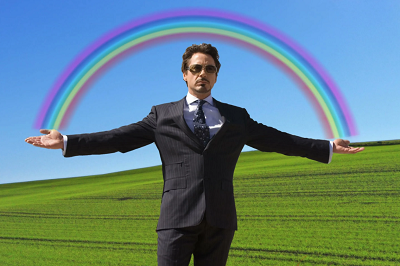